In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
%matplotlib inline

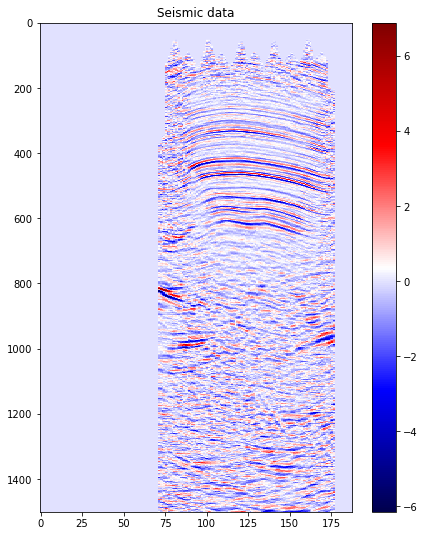

In [2]:
segyfile = r'filt_mig.sgy' #on the g-drive it's only ~300 mb

f = segyio.open(segyfile, iline=segyio.tracefield.TraceField.EnergySourcePoint, 
                xline=segyio.tracefield.TraceField.TraceNumber)
#the xline and inline numbers were grabbed from the loading info word document xl is bytes 13-16 and il is bytes 17-20

il, xl, t = f.ilines, f.xlines, f.samples
dt = t[1] - t[0]

d = segyio.cube(f) #this makes the numpy data cube
nil, nxl, nt = d.shape #number of inlines, cross lines and time 

plt.figure(figsize=(7, 9))
plt.imshow(d[nil//2].T, cmap='seismic') #the floor division selects the inline or crossline number
plt.title('Seismic data')
plt.colorbar()
plt.axis('tight');

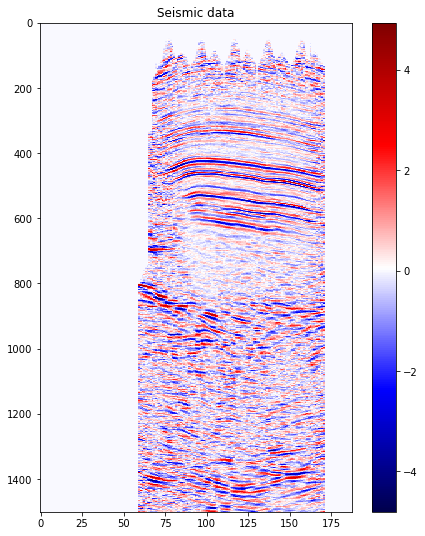

In [3]:
plt.figure(figsize=(7, 9))
plt.imshow(d[nxl//1].T, cmap='seismic') #the floor division selects the inline or crossline number
plt.title('Seismic data')
plt.colorbar()
plt.axis('tight');

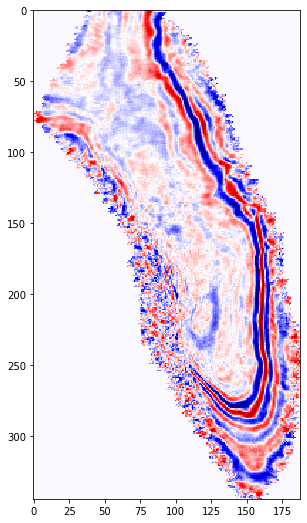

In [4]:
plt.figure(figsize=(7, 9))
plt.imshow(np.flip(d[:, :, 500], axis=0), cmap='seismic') #timeslice

In [5]:
x_coords = []
y_coords = []
z_ele = []
for source in range(nil*nxl):
    x_coords.append(f.header[source][segyio.TraceField.SourceX]//10) #each trace has its x and y coordinates
    y_coords.append(f.header[source][segyio.TraceField.SourceY]//10)
    z_ele.append(((f.header[source][segyio.TraceField.ReceiverGroupElevation]//1000)-(t/1000)*15000).tolist())
    #this is lazy migration

In [6]:
x = np.array(x_coords).reshape(nil, nxl) #x location in feet
y = np.array(y_coords).reshape(nil, nxl) #y location in feet
z = np.array(z_ele).reshape(nil, nxl, nt) #depth in feet

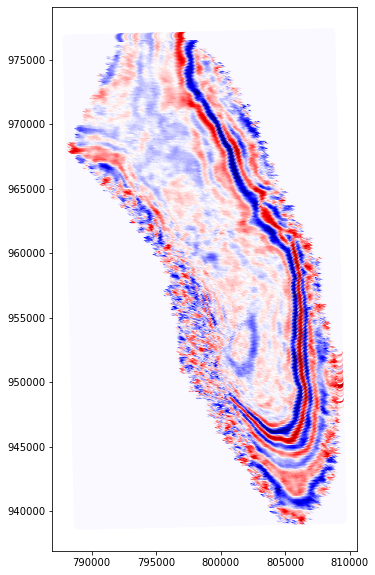

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x[0:], y[0:], c=d[:, :, 500], cmap='seismic')
ax.set_aspect(aspect='equal')